# Student success prediction
### EECS 738
Jan Polzer and Ryan Duckworth

Dataset from: https://www.kaggle.com/uciml/student-alcohol-consumption

In [20]:
import numpy as np                                   # math tools
import pandas as pd                                  # import and manage datasets
import matplotlib.pyplot as plt                      # plot charts
import statistics as s                                   # mean, stdev
import seaborn as sns
from sklearn import preprocessing                    # scale, transform data
from sklearn.model_selection import train_test_split # split data
from sklearn.linear_model import LinearRegression
from copy import deepcopy
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('ggplot')

Load dataset

In [21]:
data = pd.read_csv('data/student-mat.csv')
data.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11


In [22]:
# data = data.dropna()
data = data[np.isfinite(data['G3'])]
data = data[np.isfinite(data['Dalc'])]
data = data[np.isfinite(data['studytime'])]
data = data[np.isfinite(data['absences'])]


Transform dataset

In [23]:
le = preprocessing.LabelEncoder()

data = data.apply(le.fit_transform)

Matrix of independent variables

In [24]:
matrix = data.iloc[:, :-1].values

Dependent variable vector

In [25]:
# Students performance G3 - final grade from 0 to 20
y = data.iloc[:, 32].values

Split dataset into Test set and Training set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(matrix, y, test_size=0.2)

### Explore dataset

In [27]:
print(data.shape)
print(data.head())

(395, 33)
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob ...  \
0       0    0    3        1        0        0     4     4     0     4 ...   
1       0    0    2        1        0        1     1     1     0     2 ...   
2       0    0    0        1        1        1     1     1     0     2 ...   
3       0    0    0        1        0        1     4     2     1     3 ...   
4       0    0    1        1        0        1     3     3     2     2 ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       3         2      3     0     0       2         6   2   3   3  
1       4         2      2     0     0       2         4   2   2   3  
2       3         2      1     1     2       2        10   4   5   7  
3       2         1      1     0     0       4         2  12  11  12  
4       3         2      1     0     1       4         4   3   7   7  

[5 rows x 33 columns]


Plot historgram for each parameter

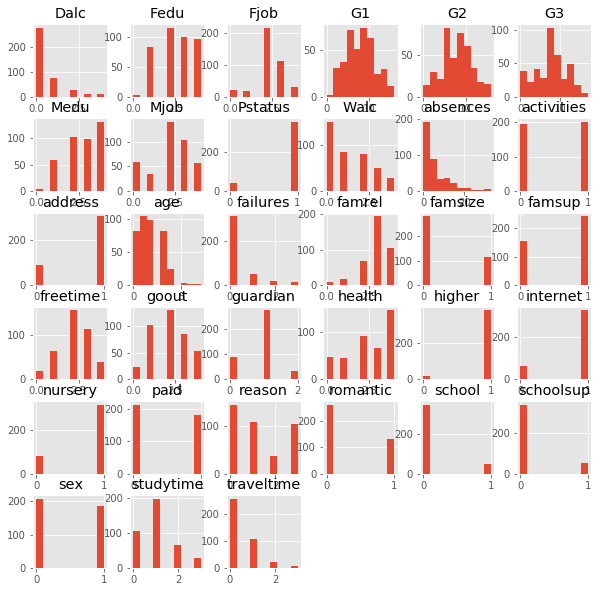

In [28]:
data.hist(figsize = (10, 10))
plt.show()


Determine if student has good (above average) / bad (bellow average) grades

In [29]:
averageGrade = s.mean(data["G3"])
goodGrades = data[data['G3'] >= averageGrade]
badGrades = data[data['G3'] < averageGrade]

print('G3 over 10/20: {}'.format(len(goodGrades)) + ' samples')
print('G3 under 10/20: {}'.format(len(badGrades)) + ' samples')

G3 over 10/20: 209 samples
G3 under 10/20: 186 samples


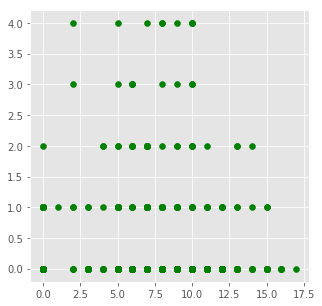

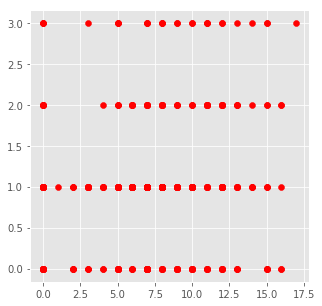

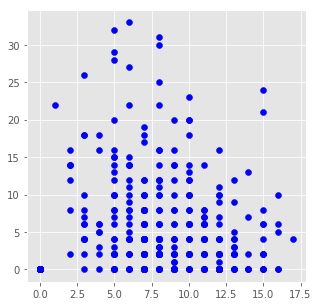

In [30]:
# Getting the values and plotting it
f1 = data['G3'].values
f2 = data['Dalc'].values      # workday alcohol comsumption 1- very low, 5 - very high
f3 = data['studytime'].values # 1 to 4, representing 0 to 10 hours
f4 = data['absences'].values  # 0 to 93, number of absences

X2 = np.array(list(zip(f1, f2)))
X3 = np.array(list(zip(f1, f3)))
X4 = np.array(list(zip(f1, f4)))

plt.scatter(f1, f2, c='green')
plt.show()
plt.scatter(f1, f3, c='red')
plt.show()
plt.scatter(f1, f4, c='blue')
plt.show()

### Analysis 
We decided to choose workday alcohol cosuption as the most valuable feature

In [31]:
# Euclidean Distance Caculator
# From https://mubaris.com/posts/kmeans-clustering/
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [32]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, 1, size=k)
# Y coordinates of random centroids
C_y2 = np.random.randint(0, np.max(X2), size=k)
C2 = np.array(list(zip(C_x, C_y2)), dtype=np.float32)

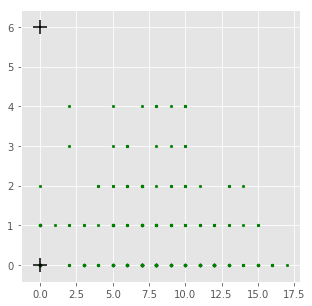

In [33]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='g', s=7)
plt.scatter(C_x, C_y2, marker='+', s=200, c='black')
plt.show()

In [34]:
# Array of clusters
clustersList = []

In [35]:
# Update the Centroid by minimizing the error to 0
# From https://mubaris.com/posts/kmeans-clustering/
def centroidUpdate(C,X):
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error >= 0.01:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
        
    clustersList.append(clusters)
    return C

In [36]:
C2 = centroidUpdate(C2,X2)

In [44]:
# Scatter plot results from centroid calculations 
# From https://mubaris.com/posts/kmeans-clustering/
def centroidPlot(num, C, X, k):
    colors = ['r', 'g', 'b', 'y']
    fig, ax = plt.subplots()
    
    clusters = clustersList[num-2]  #2 becomes 0, 3 becomes 1, 4 becomes 2
    
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='+', s=200, c='#050505')
    ax.set_title('Over / Bellow average grades prediction')
return

### Final data plot

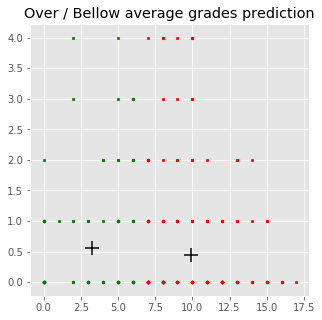

In [45]:
centroidPlot(2,C2,X2,k)